## Reproduce Supp. Fig. 10b,c,d right-hand column (validation set)
Validation set. Plot the transfer results for the test set from variant effect prediciton (Fowler,2018), Stability Deep Mutational Scanning on Natural and de novo designs (Rocklin, 2017) and extrapolation from Stability Deep Mutational Scanning on Natural and de novo designs (Rocklin, 2017) (Methods).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import random
import os
import pickle
from sklearn.externals import joblib
# To allow imports from common directory
sys.path.append('../../')
from common.plot_style_utils import set_pub_plot_context, rep_names, main_text_rep_names, save_for_pub, label_point

%matplotlib inline
random.seed(42)
np.random.seed(42)

In [2]:
with open("../../data/transfer_all_rep_results.pkl", "rb") as p:
    scores = joblib.load(p)
display(scores.keys())

dict_keys(['fowler_consistent_single_UBI', 'rocklin_ssm2', 'rocklin_ssm2_nat_eng'])

In [3]:
scores['fowler_consistent_single_UBI']

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
simple_freq_and_len,1.297563,1.000000,1.297563
all_avg_hidden,1.226228,0.533562,2.298190
arnold_random_3_7,1.219304,0.985097,1.237750
arnold_original_3_7,1.273885,0.946223,1.346284
all_1900,1.221145,0.527643,2.314339
simple_freq_plus,1.297889,0.997072,1.301700
arnold_uniform_4_1,1.193048,1.051549,1.134563
RGN,1.210681,0.945829,1.280021
3grams,1.243651,0.822908,1.511289
64_final_hidden,1.286874,0.992402,1.296726


In [4]:
scores['fowler_consistent_single_UBI'].sort_values(by='transfer_ratio_avg')

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
64_avg_hidden,1.172827,0.892562,1.314001
256_avg_hidden,1.176891,0.765082,1.538255
all_256,1.176894,0.695580,1.691961
tfidf_3grams,1.181107,0.762296,1.549406
RGN_avg_hidden,1.185388,0.582139,2.036262
arnold_uniform_4_1,1.193048,1.051549,1.134563
256_final_cell,1.201865,0.871987,1.378307
final_hidden,1.205748,0.778173,1.549460
RGN,1.210681,0.945829,1.280021
mean,1.214402,1.214402,1.000000


In [5]:
fowler = scores['fowler_consistent_single_UBI'].loc[
    ['avg_hidden', 'RGN_avg_hidden', 'RGN','arnold_uniform_4_1',"tfidf_3grams"], :
]
fowler

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
avg_hidden,1.227106,0.527135,2.327880
RGN_avg_hidden,1.185388,0.582139,2.036262
RGN,1.210681,0.945829,1.280021
arnold_uniform_4_1,1.193048,1.051549,1.134563
tfidf_3grams,1.181107,0.762296,1.549406


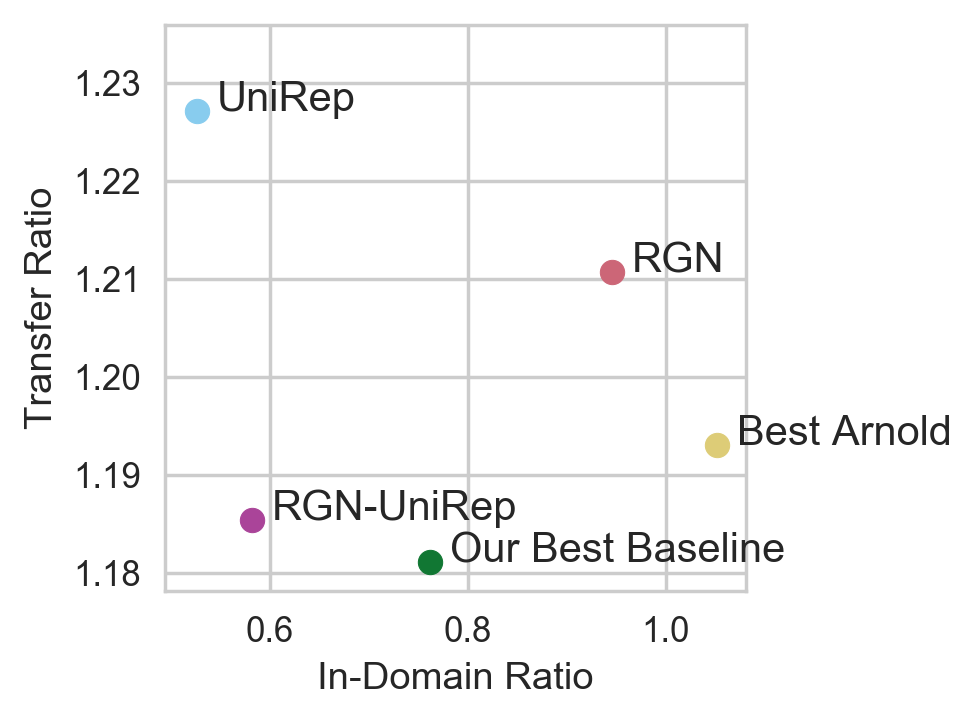

In [6]:
set_pub_plot_context(context="notebook")
fig = plt.figure(figsize=(3,3), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="In-Domain Ratio",
                    ylabel="Transfer Ratio")
palette = sns.color_palette()
color_idxs = [0,5,1,2,3]
colors = [palette[i] for i in color_idxs]
names = [main_text_rep_names[o] for o in fowler.index.values.tolist()]
names[3] = "Best Arnold"
names[4] = "Our Best Baseline"
for i, (_, row) in enumerate(fowler.iterrows()):
    ax.scatter(x=row['indomain_ratio_avg'], 
                y=row['transfer_ratio_avg'], 
                c=colors[i])
    
label_point(pd.Series(fowler.indomain_ratio_avg.values),
            pd.Series(fowler.transfer_ratio_avg.values),
            pd.Series(
                names
            ),ax, fontsize=12)
save_for_pub(fig, path="./img/b_right", dpi=250)

In [7]:
scores['rocklin_ssm2'].sort_values(by="transfer_ratio_avg")

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
RGN_final_cell,2.723806,0.545109,4.996812
64_final_hidden,2.842594,0.860954,3.301679
final_cell,2.876235,0.525124,5.477253
all_1900,2.933025,0.507895,5.774868
RGN_avg_hidden,3.064767,0.531532,5.765910
all_avg_hidden,3.115052,0.502672,6.196991
avg_hidden,3.153871,0.512984,6.148088
all_64,3.198963,0.677221,4.723659
all_final_cell,3.259452,0.536181,6.079019
tfidf_2grams,3.760356,0.972567,3.866425


In [8]:
ssm2 = scores['rocklin_ssm2'].loc[
    ['avg_hidden', 'RGN_avg_hidden', 'RGN','arnold_original_3_7',"tfidf_2grams"], :
]
ssm2

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
avg_hidden,3.153871,0.512984,6.148088
RGN_avg_hidden,3.064767,0.531532,5.765910
RGN,4.557848,0.660704,6.898476
arnold_original_3_7,3.879844,0.961306,4.036011
tfidf_2grams,3.760356,0.972567,3.866425


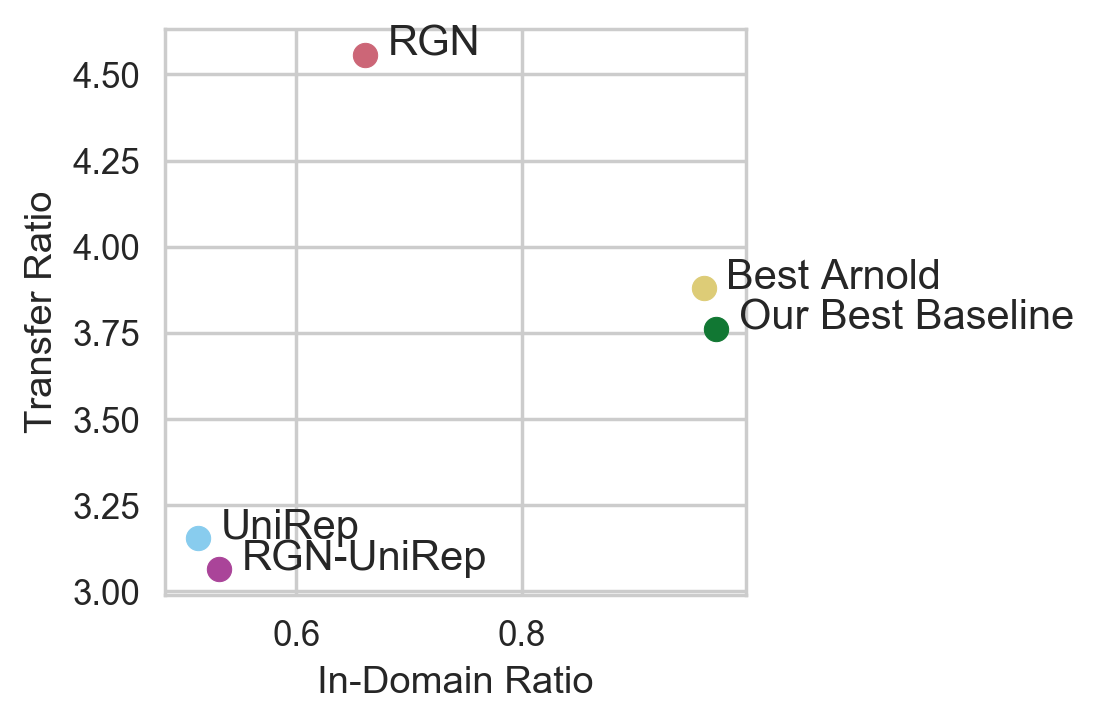

In [9]:
set_pub_plot_context(context="notebook")
fig = plt.figure(figsize=(3,3), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="In-Domain Ratio",
                    ylabel="Transfer Ratio")
palette = sns.color_palette()
color_idxs = [0,5,1,2,3]
colors = [palette[i] for i in color_idxs]
names = [main_text_rep_names[o] for o in ssm2.index.values.tolist()]
names[3] = "Best Arnold"
names[4] = "Our Best Baseline"
for i, (_, row) in enumerate(ssm2.iterrows()):
    ax.scatter(x=row['indomain_ratio_avg'], 
                y=row['transfer_ratio_avg'], 
                c=colors[i])
    
label_point(pd.Series(ssm2.indomain_ratio_avg.values),
            pd.Series(ssm2.transfer_ratio_avg.values),
            pd.Series(
                names
            ),ax, fontsize=12)
save_for_pub(fig, path="./img/c_right", dpi=250)

In [10]:
scores

{'fowler_consistent_single_UBI':                       transfer_ratio_avg  indomain_ratio_avg  perf_ratio_avg
 simple_freq_and_len             1.297563            1.000000        1.297563
 all_avg_hidden                  1.226228            0.533562        2.298190
 arnold_random_3_7               1.219304            0.985097        1.237750
 arnold_original_3_7             1.273885            0.946223        1.346284
 all_1900                        1.221145            0.527643        2.314339
 simple_freq_plus                1.297889            0.997072        1.301700
 arnold_uniform_4_1              1.193048            1.051549        1.134563
 RGN                             1.210681            0.945829        1.280021
 3grams                          1.243651            0.822908        1.511289
 64_final_hidden                 1.286874            0.992402        1.296726
 arnold_scrambled_3_5            1.270235            1.016038        1.250184
 64_final_cell                  

In [11]:
extrap_df = pd.read_csv("../../data/for_figure_rocklin_ssm2_to_remote_transfer_results_validate.csv", index_col=0)
extrap_df

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
mean,4.238524,4.231367,1.001691
simple_freq_plus,4.238524,0.987647,4.291536
simple_freq_and_len,2.728035,1.000000,2.728035
tfidf_3grams,3.556599,0.990474,3.590806
3grams,3.270618,0.986201,3.316382
tfidf_2grams,4.460238,0.839154,5.315158
2grams,4.917777,0.812084,6.055752
RGN,3.565013,0.638155,5.586435
64_avg_hidden,4.238524,0.817224,5.186487
64_final_hidden,5.203945,0.853308,6.098555


In [12]:
extrap_df.sort_values(by='transfer_ratio_avg')

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
avg_hidden,1.733482,0.501407,3.457237
simple_freq_and_len,2.728035,1.000000,2.728035
final_hidden,2.957870,0.607367,4.869985
all_1900,2.981409,0.534368,5.579315
64_final_cell,3.183160,0.865978,3.675798
3grams,3.270618,0.986201,3.316382
tfidf_3grams,3.556599,0.990474,3.590806
RGN,3.565013,0.638155,5.586435
RGN_final_cell,3.692095,0.557248,6.625590
arnold_random_3_7,3.777476,1.116178,3.384295


In [13]:
ssm2_extrap = extrap_df.loc[
    ['avg_hidden', 'RGN_avg_hidden', 'RGN','arnold_random_3_7',"simple_freq_and_len"], :
]
ssm2_extrap

,transfer_ratio_avg,indomain_ratio_avg,perf_ratio_avg
avg_hidden,1.733482,0.501407,3.457237
RGN_avg_hidden,4.069901,0.529977,7.679386
RGN,3.565013,0.638155,5.586435
arnold_random_3_7,3.777476,1.116178,3.384295
simple_freq_and_len,2.728035,1.000000,2.728035


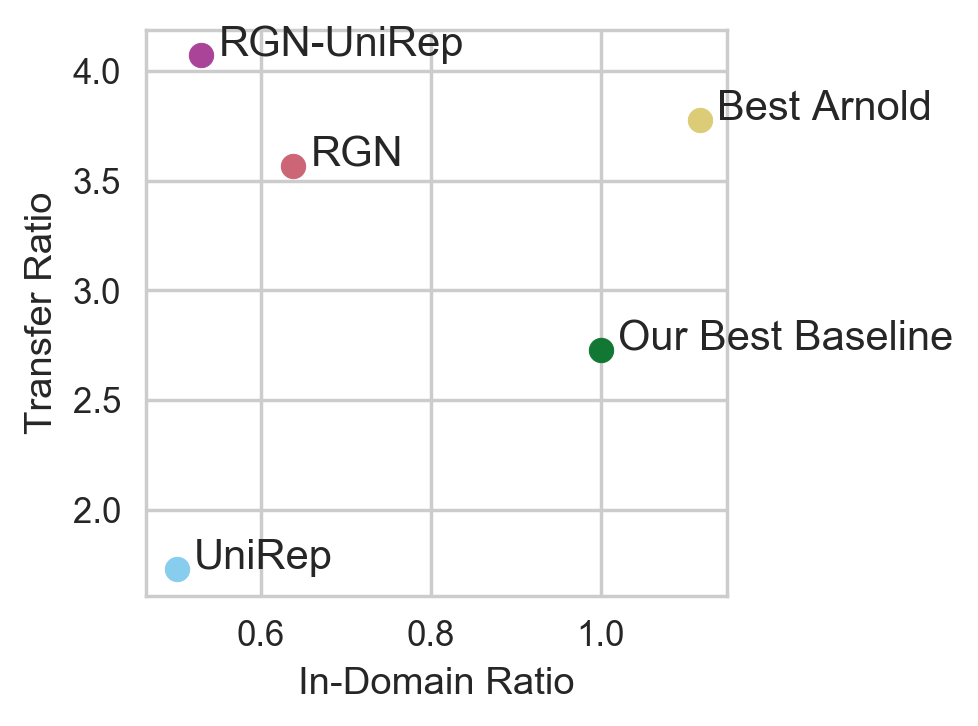

In [14]:
set_pub_plot_context(context="notebook")
fig = plt.figure(figsize=(3,3), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="In-Domain Ratio",
                    ylabel="Transfer Ratio")
palette = sns.color_palette()
color_idxs = [0,5,1,2,3]
colors = [palette[i] for i in color_idxs]
names = [main_text_rep_names[o] for o in ssm2.index.values.tolist()]
names[3] = "Best Arnold"
names[4] = "Our Best Baseline"
for i, (_, row) in enumerate(ssm2_extrap.iterrows()):
    ax.scatter(x=row['indomain_ratio_avg'], 
                y=row['transfer_ratio_avg'], 
                c=colors[i])
    
label_point(pd.Series(ssm2_extrap.indomain_ratio_avg.values),
            pd.Series(ssm2_extrap.transfer_ratio_avg.values),
            pd.Series(
                names
            ),ax, fontsize=12)
save_for_pub(fig, path="./img/d_right", dpi=250)